### Introduction
In this project we are interested in data imputation in sparce matrices using coclustering with Mutual Information and Modularity based criterions, using different initialisations and compare them<br/><br/>
Since this work centers on imputation using coclustering, so we will analyse results in term of clustering and imputation reliability (i.e. How close values imputed are from the original ones) 
We put an extra effort in the presentation and readability of the code and results :
    - Since we added an imputation step in the coclustering so the the computation time could take longer, thus we added a nice progress bar to show evolution.
    - Results are grouped by dataset and by method (MI or Modularity based), and for Each method 

In [4]:
%cd coclust
#!os.chdir('./coclust')
!python3 setup.py install
%cd ..

/Users/amine/Desktop/Coclustering-Imputation/coclust
running install
running bdist_egg
running egg_info
writing coclust.egg-info/PKG-INFO
writing dependency_links to coclust.egg-info/dependency_links.txt
writing entry points to coclust.egg-info/entry_points.txt
writing requirements to coclust.egg-info/requires.txt
writing top-level names to coclust.egg-info/top_level.txt
reading manifest file 'coclust.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'coclust.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-10.15-x86_64/egg
running install_lib
running build_py
copying coclust/coclustering/coclust_info.py -> build/lib/coclust/coclustering
creating build/bdist.macosx-10.15-x86_64/egg
creating build/bdist.macosx-10.15-x86_64/egg/coclust
creating build/bdist.macosx-10.15-x86_64/egg/coclust/visualization
copying build/lib/coclust/visualization/__init__.py -> build/bdist.macosx-10.15-x86_64/egg/coclust/visualization
copying build/lib/coclu

In [1]:
from scipy.io import loadmat
from matplotlib.pyplot import * 
import matplotlib.pyplot as plt

import os
import scipy.sparse as sp
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

from coclust.io.data_loading import load_doc_term_data
from coclust.visualization import (plot_reorganized_matrix,
                                  plot_cluster_top_terms,
                                  plot_max_modularities)

from coclust.evaluation.internal import best_modularity_partition
from coclust.coclustering import CoclustMod
from coclust.coclustering import CoclustInfo

# Import original datasets

In [383]:
## CSTR
file_name = "datasets/cstr.mat"
cstr = loadmat(file_name)

## WebKB4
## WebACE
file_name = "datasets/WebACE.mat"
WebACE = loadmat(file_name)

## NG10
## NG20
file_name = "datasets/NG20.mat"
NG20 = loadmat(file_name)

## RCV1
file_name = "datasets/RCV1_ori.mat"
RCV1 = loadmat(file_name)

## Reviews
file_name = "datasets/reviews.mat"
reviews = loadmat(file_name)

## Sports
file_name = "datasets/sports.mat"
sports = loadmat(file_name)

## Classic3
file_name = "datasets/classic3.mat"
classic3 = loadmat(file_name)

## Classic4 -- sum == 0 !? --
file_path = os.path.join('datasets', "classic4.txt")
nb_row = 7095
nb_col = 5896
classic4 = sp.lil_matrix((nb_row, nb_col))


#print(np.sum(classic4.toarray()))
#print(np.unique(WebACE['fea']))

# Import transformed data
Tests will be performed on 
- CSTR
- WebACE
- Classic3<br/>

We generated NaNs for CSTR and WebACE in range (5% --> 35%, by 5)
<br/>And since Classic3 is more large, we just tested with 5%, 15% and 25% 
#### NB. All preprocessing was done using R (see: MissMDA.R) and the results were exported to be imported here
<font color='red'>Important ! When importing NaN indexes from R, we need to decrease them by 1 (R starts from 1)</font>

### CSTR

In [384]:
file_name = "datasets/cstr/cstr"
cstr5  = pd.read_csv(file_name+"5_I.csv").values
cstr10 = pd.read_csv(file_name+"10_I.csv").values
cstr15 = pd.read_csv(file_name+"15_I.csv").values
cstr20 = pd.read_csv(file_name+"20_I.csv").values
cstr25 = pd.read_csv(file_name+"25_I.csv").values
cstr30 = pd.read_csv(file_name+"30_I.csv").values
cstr35 = pd.read_csv(file_name+"35_I.csv").values

file_name = "datasets/cstr/NA_cstr"
NA_cstr5  = pd.DataFrame(list(zip(loadmat(file_name+"5.mat")['row'][0]-1, loadmat(file_name+"5.mat")['col'][0]-1)), columns =['row','col'])
NA_cstr10 = pd.DataFrame(list(zip(loadmat(file_name+"10.mat")['row'][0]-1, loadmat(file_name+"10.mat")['col'][0]-1)), columns =['row','col'])
NA_cstr15 = pd.DataFrame(list(zip(loadmat(file_name+"15.mat")['row'][0]-1, loadmat(file_name+"15.mat")['col'][0]-1)), columns =['row','col'])
NA_cstr20 = pd.DataFrame(list(zip(loadmat(file_name+"20.mat")['row'][0]-1, loadmat(file_name+"20.mat")['col'][0]-1)), columns =['row','col'])
NA_cstr25 = pd.DataFrame(list(zip(loadmat(file_name+"25.mat")['row'][0]-1, loadmat(file_name+"25.mat")['col'][0]-1)), columns =['row','col'])
NA_cstr30 = pd.DataFrame(list(zip(loadmat(file_name+"30.mat")['row'][0]-1, loadmat(file_name+"30.mat")['col'][0]-1)), columns =['row','col'])
NA_cstr35 = pd.DataFrame(list(zip(loadmat(file_name+"35.mat")['row'][0]-1, loadmat(file_name+"35.mat")['col'][0]-1)), columns =['row','col'])

### WebACE

In [385]:
file_name = "datasets/webACE/webACE"
webACE5  = pd.read_csv(file_name+"5_I.csv").values
webACE10 = pd.read_csv(file_name+"10_I.csv").values
webACE15 = pd.read_csv(file_name+"15_I.csv").values
webACE20 = pd.read_csv(file_name+"20_I.csv").values
webACE25 = pd.read_csv(file_name+"25_I.csv").values
webACE30 = pd.read_csv(file_name+"30_I.csv").values
webACE35 = pd.read_csv(file_name+"35_I.csv").values

file_name = "datasets/webACE/NA_webACE"
NA_webACE5  = pd.DataFrame(list(zip(loadmat(file_name+"5.mat")['row'][0]-1, loadmat(file_name+"5.mat")['col'][0]-1)), columns =['row','col'])
NA_webACE10 = pd.DataFrame(list(zip(loadmat(file_name+"10.mat")['row'][0]-1, loadmat(file_name+"10.mat")['col'][0]-1)), columns =['row','col'])
NA_webACE15 = pd.DataFrame(list(zip(loadmat(file_name+"15.mat")['row'][0]-1, loadmat(file_name+"15.mat")['col'][0]-1)), columns =['row','col'])
NA_webACE20 = pd.DataFrame(list(zip(loadmat(file_name+"20.mat")['row'][0]-1, loadmat(file_name+"20.mat")['col'][0]-1)), columns =['row','col'])
NA_webACE25 = pd.DataFrame(list(zip(loadmat(file_name+"25.mat")['row'][0]-1, loadmat(file_name+"25.mat")['col'][0]-1)), columns =['row','col'])
NA_webACE30 = pd.DataFrame(list(zip(loadmat(file_name+"30.mat")['row'][0]-1, loadmat(file_name+"30.mat")['col'][0]-1)), columns =['row','col'])
NA_webACE35 = pd.DataFrame(list(zip(loadmat(file_name+"35.mat")['row'][0]-1, loadmat(file_name+"35.mat")['col'][0]-1)), columns =['row','col'])

### Classic3

In [386]:
file_name = "datasets/classic3/classic"
classic3_5  = pd.read_csv(file_name+"5_I.csv").values
classic3_15 = pd.read_csv(file_name+"15_I.csv").values
classic3_25 = pd.read_csv(file_name+"25_I.csv").values

file_name = "datasets/classic3/NA_classic"
NA_classic3_5  = pd.DataFrame(list(zip(loadmat(file_name+"5.mat")['row'][0]-1, loadmat(file_name+"5.mat")['col'][0]-1)), columns =['row','col'])
NA_classic3_15 = pd.DataFrame(list(zip(loadmat(file_name+"15.mat")['row'][0]-1, loadmat(file_name+"15.mat")['col'][0]-1)), columns =['row','col'])
NA_classic3_25 = pd.DataFrame(list(zip(loadmat(file_name+"25.mat")['row'][0]-1, loadmat(file_name+"25.mat")['col'][0]-1)), columns =['row','col'])

KeyError: 'row'

Quick verification

In [388]:
t  = len(NA_cstr25)==cstr['fea'].size*0.25
t += len(NA_cstr30)==cstr['fea'].size*0.3

t += len(NA_webACE10)==WebACE['fea'].size*0.1
t += len(NA_webACE30)==WebACE['fea'].size*0.3

t += len(NA_classic3_10)==classic3['A'].size*0.1
t += len(NA_classic3_30)==classic3['A'].size*0.3

print(t==4)

#print(cstr15.sum())
#print(cstr['fea'].sum())
#print(np.isnan(WebACE['fea'].data).any())

True


# CoclustModImput
### CSTR

In [389]:
CMI_cstr = []
k = 4
print("-- CoclustModImput --")
print('-- Cstr 5%')
CMI_cstr5 = CoclustMod(k, missing_indexes=NA_cstr5)
CMI_cstr5.fit(cstr5); CMI_cstr.append(CMI_cstr5)
print('-- Cstr 10%')
CMI_cstr10 = CoclustMod(k, missing_indexes=NA_cstr10)
CMI_cstr10.fit(cstr10); CMI_cstr.append(CMI_cstr10)
print('-- Cstr 15%')
CMI_cstr15 = CoclustMod(k, missing_indexes=NA_cstr15)
CMI_cstr15.fit(cstr15); CMI_cstr.append(CMI_cstr15)
print('-- Cstr 20%')
CMI_cstr20 = CoclustMod(k, missing_indexes=NA_cstr20)
CMI_cstr20.fit(cstr20); CMI_cstr.append(CMI_cstr20)
print('-- Cstr 25%')
CMI_cstr25 = CoclustMod(k, missing_indexes=NA_cstr25)
CMI_cstr25.fit(cstr25); CMI_cstr.append(CMI_cstr25)
print('-- Cstr 30%')
CMI_cstr30 = CoclustMod(k, missing_indexes=NA_cstr30)
CMI_cstr30.fit(cstr30); CMI_cstr.append(CMI_cstr30)
print('-- Cstr 35%')
CMI_cstr35 = CoclustMod(k, missing_indexes=NA_cstr35)
CMI_cstr35.fit(cstr35); CMI_cstr.append(CMI_cstr35)

-- CoclustModImput --
-- Cstr 5%
Progress: [================]   ## With Imputation ##
-- Cstr 10%
Progress: [================]   ## With Imputation ##
-- Cstr 15%
Progress: [================]   ## With Imputation ##
-- Cstr 20%
Progress: [================]   ## With Imputation ##
-- Cstr 25%
Progress: [================]   ## With Imputation ##
-- Cstr 30%
Progress: [================]   ## With Imputation ##
-- Cstr 35%
Progress: [================]   ## With Imputation ##


## Store results
- Imputation Reliability : <font color='blue'>MAE</font> (Since are only interested in analysing accuracy of imputation by value so penalysing large values(RMSE) does not matter, thus Mean Absolute Error is more appropriate)
- Clustering Result : 
    - <font color='blue'>NMI</font>
    - <font color='blue'>Accuracy</font>
    - <font color='blue'>modularity</font>


In [392]:
from sklearn.metrics import mean_absolute_error
from coclust.evaluation import external

real_labels = [i[0] for i in cstr['gnd'].tolist()]
accuracy_CMI_cstr = []
NMI_CMI_cstr = []
MAE_CMI_cstr = []
modularity_CMI_cstr = []

for cmi in CMI_cstr:
    accuracy_CMI_cstr.append(external.accuracy(real_labels, cmi.row_labels_))
    NMI_CMI_cstr.append(nmi(real_labels, cmi.row_labels_))
    MAE_CMI_cstr.append(mean_absolute_error(cstr['fea'], cmi.X))
    modularity_CMI_cstr.append(cmi.modularity)

/usr/local/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/p

In [ ]:
## Test without imputation
coclustMod = CoclustMod(20)
coclustMod.fit(missX2.values)

In [412]:
def plot_RM(X, model, precision=0.8, markersize=0.9):

    row_indices = np.argsort(model.row_labels_)
    col_indices = np.argsort(model.column_labels_)
    X_reorg = X[row_indices, :]
    X_reorg = X_reorg[:, col_indices]
    plt.spy(X_reorg, precision=precision, markersize=markersize)
    plt.tick_params(axis='both', which='both', bottom='off', top='off',
                    right='off', left='off')
    #plt.show()

Text(0.5, 1.05, 'CoclustModImput CSTR 35%')

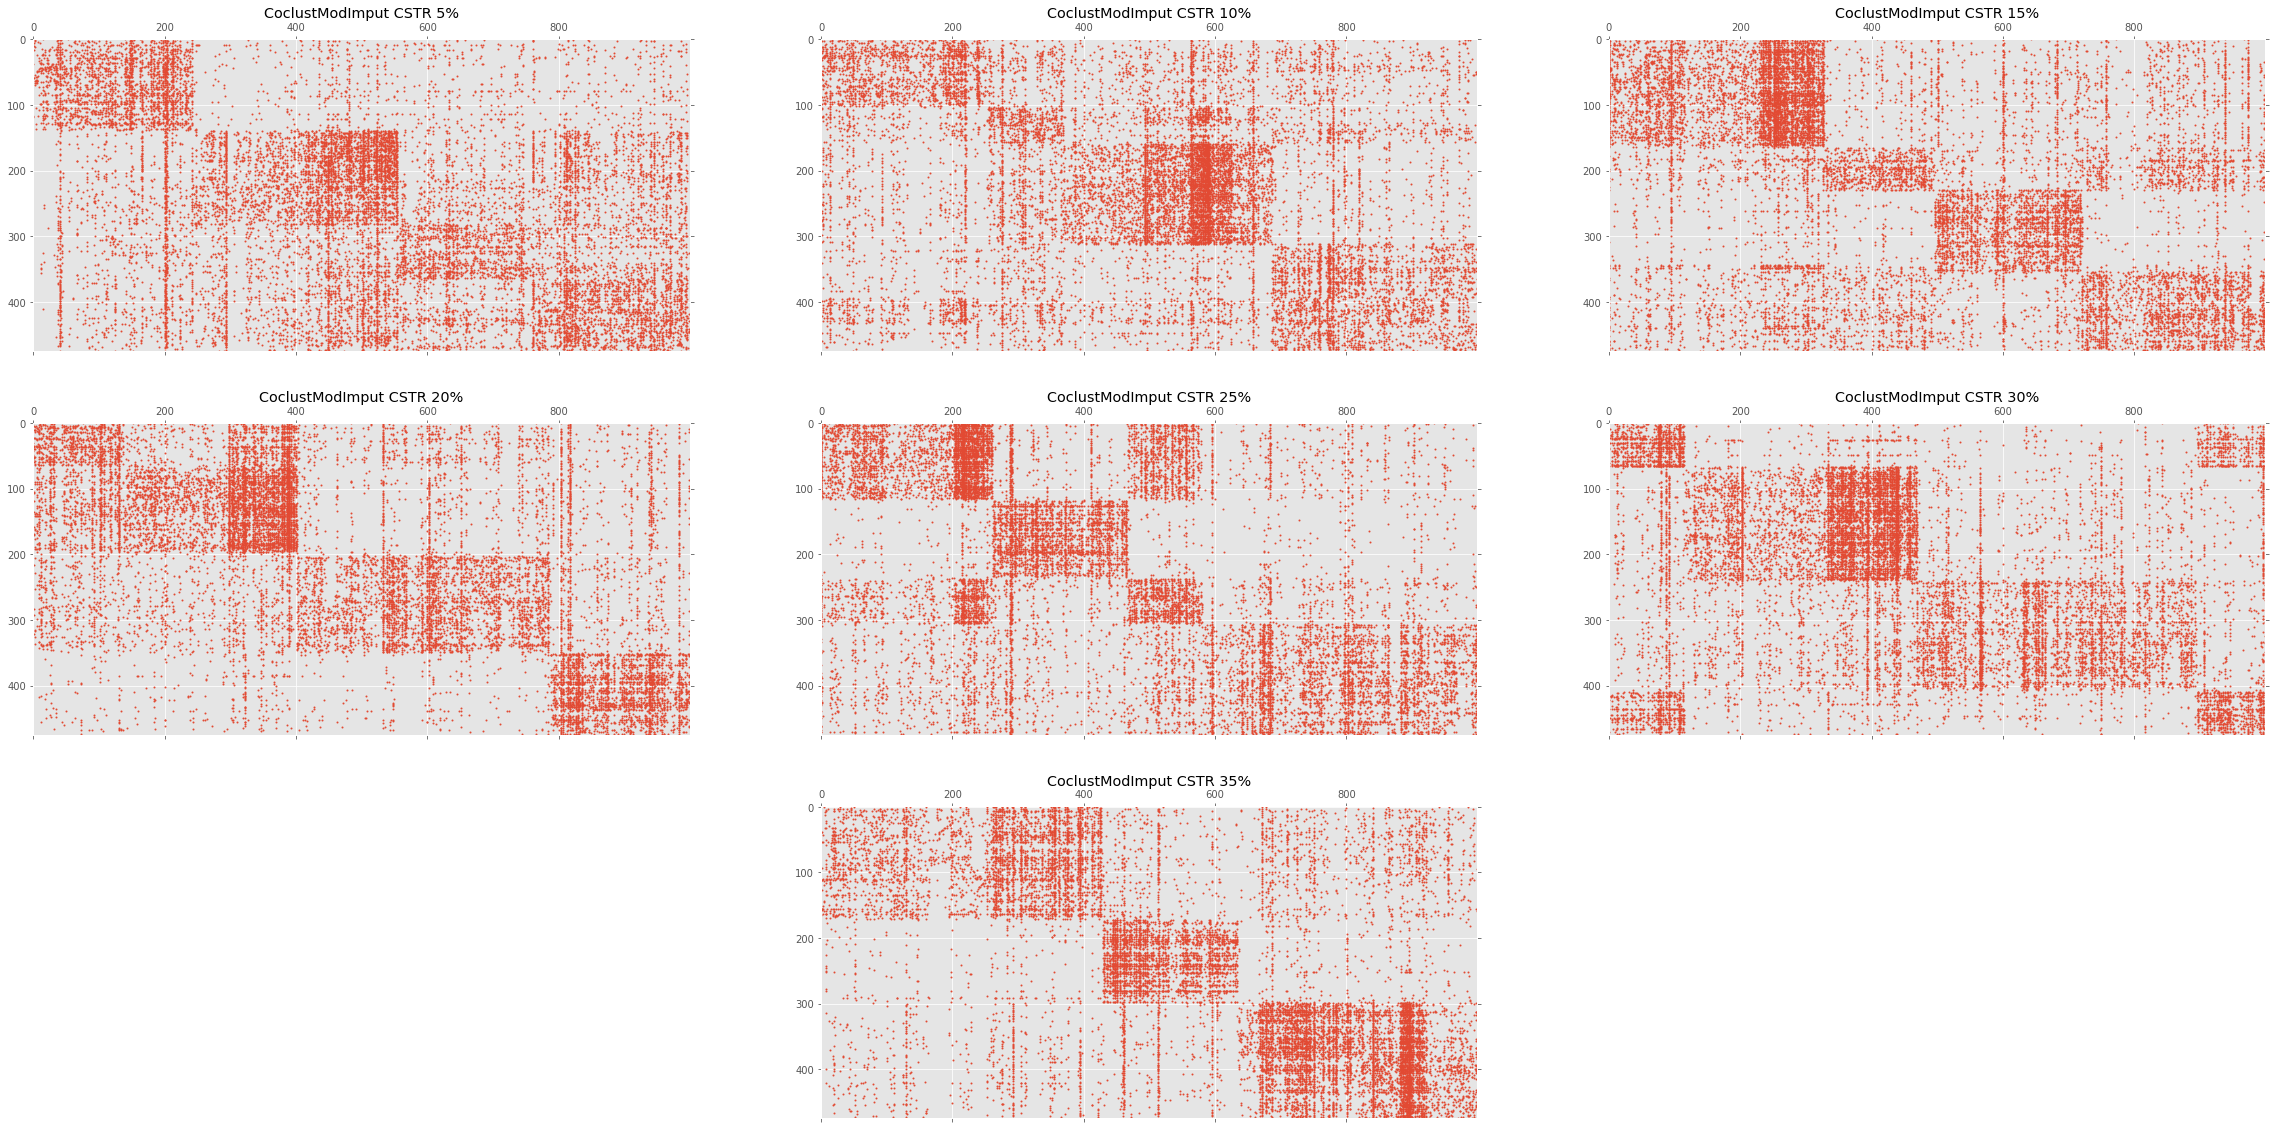

In [425]:
figure(num=None, figsize=(40, 20))
subplot(3, 3, 1)
plot_RM(cstr5, CMI_cstr[0])
matplotlib.pyplot.title('CoclustModImput CSTR 5%')
subplot(3, 3, 2)
plot_RM(cstr10, CMI_cstr[1])
matplotlib.pyplot.title('CoclustModImput CSTR 10%')
subplot(3, 3, 3)
plot_RM(cstr15, CMI_cstr[2])
matplotlib.pyplot.title('CoclustModImput CSTR 15%')
subplot(3, 3, 4)
plot_RM(cstr20, CMI_cstr[3])
matplotlib.pyplot.title('CoclustModImput CSTR 20%')
subplot(3, 3, 5)
plot_RM(cstr25, CMI_cstr[4])
matplotlib.pyplot.title('CoclustModImput CSTR 25%')
subplot(3, 3, 6)
plot_RM(cstr30, CMI_cstr[5])
matplotlib.pyplot.title('CoclustModImput CSTR 30%')
subplot(3, 3, 8)
plot_RM(cstr35, CMI_cstr[6])
matplotlib.pyplot.title('CoclustModImput CSTR 35%')

# CoclustInfoImput on MissMDA

In [ ]:
CII_cstr = []
k = 4
print("-- CoclustInfoImput --")
print('-- Cstr 5%')
CII_cstr5 = CoclustInfo(k, k, missing_indexes=NA_cstr5)
CII_cstr5.fit(cstr5); CII_cstr.append(CMI_cstr5)
print('-- Cstr 10%')
CII_cstr10 = CoclustInfo(k, k, missing_indexes=NA_cstr10)
CII_cstr10.fit(cstr10); CII_cstr.append(CMI_cstr10)
print('-- Cstr 15%')
CII_cstr15 = CoclustInfo(k, k, missing_indexes=NA_cstr15)
CII_cstr15.fit(cstr15); CII_cstr.append(CMI_cstr15)
print('-- Cstr 20%')
CII_cstr20 = CoclustInfo(k, k, missing_indexes=NA_cstr20)
CII_cstr20.fit(cstr20); CII_cstr.append(CMI_cstr20)
print('-- Cstr 25%')
CII_cstr25 = CoclustInfo(k, k, missing_indexes=NA_cstr25)
CII_cstr25.fit(cstr25); CII_cstr.append(CMI_cstr25)
print('-- Cstr 30%')
CII_cstr30 = CoclustInfo(k, k, missing_indexes=NA_cstr30)
CII_cstr30.fit(cstr30); CII_cstr.append(CMI_cstr30)
print('-- Cstr 35%')
CII_cstr35 = CoclustInfo(k, k, missing_indexes=NA_cstr35)
CII_cstr35.fit(cstr35); CII_cstr.append(CMI_cstr35)

-- CoclustInfoImput --
-- Cstr 5%
Max Iterations: 20
Progress: [=======>        ]   ## With Imputation ##

In [137]:
'''print(WebACE['fea'].sum())
print(missX.values.sum())
print(coclustInfoImput.X.sum())'''

615261.2954470558
614425.9984866497
613635.0807507811


In [ ]:
accuracy_CII_cstr = []
NMI_CII_cstr = []
MAE_CII_cstr = []
MI_CII_cstr = []

for cii in CII_cstr:
    accuracy_CII_cstr.append(external.accuracy(real_labels, cii.row_labels_))
    NMI_CII_cstr.append(nmi(real_labels, cii.row_labels_))
    MAE_CII_cstr.append(mean_absolute_error(cstr['fea'], cii.X))
    MI_CII_cstr.append(cii.criterion)

In [ ]:
figure(num=None, figsize=(40, 20), dpi=30)
subplot(3, 3, 1)
plot_RM(cstr5, CII_cstr[0])
subplot(3, 3, 2)
plot_RM(cstr10, CII_cstr[1])
subplot(3, 3, 3)
plot_RM(cstr15, CII_cstr[2])
subplot(3, 3, 4)
plot_RM(cstr20, CII_cstr[3])
subplot(3, 3, 5)
plot_RM(cstr25, CII_cstr[4])
subplot(3, 3, 6)
plot_RM(cstr30, CII_cstr[5])
subplot(3, 3, 8)
plot_RM(cstr35, CII_cstr[6])

# Random Init - CoclustInfoImput & CoclustModImput -
We are interested in testing whether MissMDA enhanced results or not<br/>
To do so, we will pick one of the available matrices filled by MissMDA, for example the 20% one, and fill NaN indexes with zeros (since we have sparce matrices and small values, we replace values by 0) and compare the coclustImput results to the MissMDA initialisation

In [426]:
cstr_rand = cstr['fea'].copy()
cstr_rand[NA_cstr20.row, NA_cstr20.col] = 0

print(cstr['fea'].sum(),cstr_rand.sum())

73039.82882660216 59247.842383625204


In [449]:
k = 4
print('CoclustModImput -- Random Init --')
CMI_cstr_rand = CoclustMod(k, missing_indexes=NA_cstr20)
CMI_cstr_rand.fit(cstr_rand);

print('CoclustModImput -- Whitout Imputation --')
CMI_cstr_missMDA = CoclustMod(k)
CMI_cstr_missMDA.fit(cstr20);

print('\nCoclustInfoImput -- Random Init --')
CII_cstr_rand = CoclustInfo(k, k, missing_indexes=NA_cstr20)
CII_cstr_rand.fit(cstr_rand);

print('\nCoclustInfoImput -- Random Init --')
CII_cstr_missMDA = CoclustInfo(k, k)
CII_cstr_missMDA.fit(cstr20);

CoclustModImput -- Whitout Imputation --
Progress: [================]   ## Without Imputation ##


In [442]:
accuracy_CMI_cstr_rand = external.accuracy(real_labels, CMI_cstr_rand.row_labels_)
NMI_CMI_cstr_rand = nmi(real_labels, CMI_cstr_rand.row_labels_)
MAE_CMI_cstr_rand = mean_absolute_error(cstr['fea'], CMI_cstr_rand.X)
modularity_CMI_cstr_rand = CMI_cstr_rand.modularity

accuracy_CII_cstr_rand = external.accuracy(real_labels, CII_cstr_rand.row_labels_)
NMI_CII_cstr_rand = nmi(real_labels, CII_cstr_rand.row_labels_)
MAE_CII_cstr_rand = mean_absolute_error(cstr['fea'], CII_cstr_rand.X.toarray())
MI_CII_cstr_rand = CII_cstr_rand.criterion

/usr/local/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [447]:
print(accuracy_CMI_cstr_rand, accuracy_CMI_cstr[3])
print(NMI_CMI_cstr_rand, NMI_CMI_cstr[3])
print(modularity_CMI_cstr_rand, modularity_CMI_cstr[3])


0.8021052631578948 0.7178947368421053
0.5913137719231543 0.6413626695417015
0.45464891940953267 0.42709195448127824


Text(0.5, 1.05, 'CoclustInfoImput with Random Init')

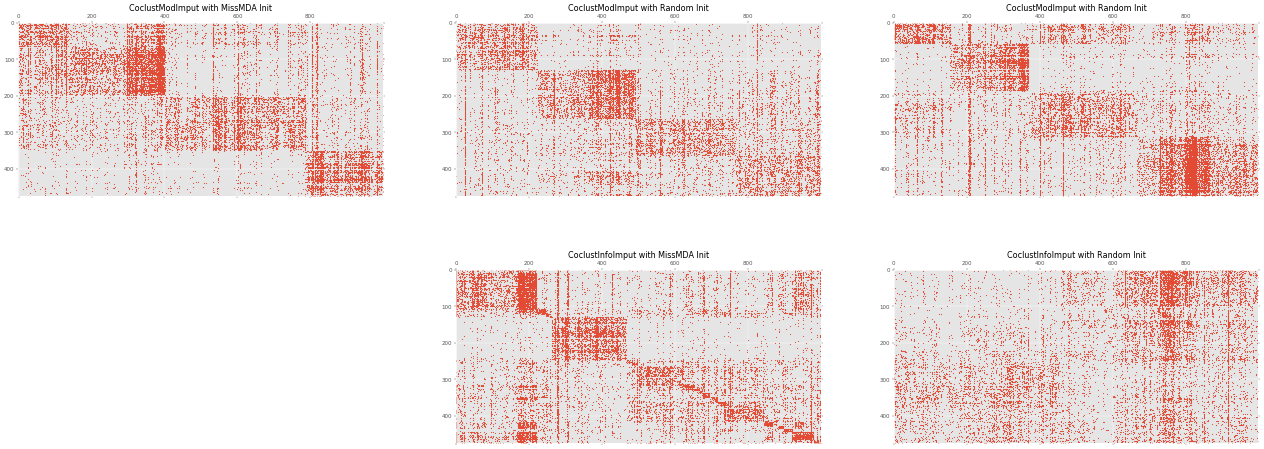

In [480]:
figure(num=None, figsize=(40, 15), dpi=40)
subplot(2, 3, 1)
plot_RM(cstr20, CMI_cstr[3])
title('CoclustModImput with MissMDA Init')
subplot(2, 3, 2)
plot_RM(cstr_rand, CMI_cstr_rand)
title('CoclustModImput with Random Init')
subplot(2, 3, 3)
plot_RM(cstr20, CMI_cstr_missMDA)
title('CoclustModImput with Random Init')

subplot(2, 3, 5)
plot_RM(cstr20, CII_cstr[3])
title('CoclustInfoImput with MissMDA Init')
subplot(2, 3, 6)
plot_RM(cstr_rand, CII_cstr_rand)
title('CoclustInfoImput with Random Init')

Since MissMDA is based on dim reduction and coclust imputes based on clustering criteria, it's worth comparing the difference between the two on term on resulting clustering

# Visualization